In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import datasets

* Exploración Inicial:
Examinen el conjunto de datos para entender su estructura, las variables disponibles y la cantidad de datos con los que trabajarán.
* Limpieza de Datos:
Identifiquen y traten los valores nulos. Pueden optar por eliminar filas con valores nulos o imputar estos valores.
Detecten y decidan cómo manejar los datos atípicos para evitar distorsiones en el análisis.
* Análisis Exploratorio de Datos (EDA):
Realicen un análisis para explorar las relaciones entre las variables. Usen gráficos y estadísticas para resumir los datos.
* Preprocesamiento de Datos:
Normalicen o estandaricen las variables numéricas para asegurar que estén en una escala comparable.
Conviertan las variables categóricas (como el género) en formatos numéricos utilizando técnicas adecuadas de codificación.
* División de Datos:
Separen el conjunto de datos en dos: un conjunto de entrenamiento y otro de prueba.
* Modelado de Regresión:
Construyan un modelo de regresión usando el conjunto de entrenamiento. Pueden empezar con una regresión lineal simple y luego explorar modelos más complejos si es necesario.
* Evaluación del Modelo:
Utilicen el conjunto de prueba para evaluar el rendimiento de su modelo. Presten atención a métricas como el RMSE y �2R2.
* Iteración:
Basándose en la evaluación, ajusten su modelo si es necesario. Experimenten con diferentes técnicas de modelado o selección de variables para mejorar los resultados.
* Documentación:
Documenten cuidadosamente su proceso de análisis y los resultados obtenidos, incluyendo gráficos y tablas que resuman sus hallazgos.
* GitHub:
Creación de Repositorio: Crear un repositorio en GitHub para su proyecto.
Estructura del Repositorio: Organizar el repositorio con carpetas claramente definidas para datos, scripts de análisis y documentos.

In [176]:
df = pd.read_csv(r'C:\Users\Jesús\Desktop\BOOTCAMP\TEMARIO\MODULO_1\SESION_12\REGRESION\possum.csv')

In [177]:
df 

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


* site
uno de los siete lugares donde se atraparon zarigüeyas. Los lugares fueron, por orden, Cambarville, Bellbird, Whian Whian, Byrangery, Conondale, Allyn River y Bulburin.

* Pop
factor que clasifica los lugares como Vic Victoria, otros Nueva Gales del Sur o Queensland

* sex

* age


* hdlngth
longitud de la cabeza

* skullw
anchura del cráneo

* totlngth
longitud total

* tail
longitud de la cola

* footlgth
longitud del pie

* earconch
longitud de la concha auricular

* eye
distancia del canto medial al canto lateral del ojo derecho

* chest
perímetro torácico (en cm)

* belly 
perímetro abdominal (en cm)

In [178]:
df.shape

(104, 14)

In [179]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [180]:
# Eliminamos columna case que solo indica indice
df.drop(['case'], inplace=True, axis=1)

In [181]:
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [182]:
str_columnas = df.select_dtypes(include = 'object').columns
num_columnas = df.select_dtypes(exclude='object').columns
print(f'Columnas categóricas: {str_columnas}')
print(f'Columnas numéricas: {num_columnas}')

Columnas categóricas: Index(['Pop', 'sex'], dtype='object')
Columnas numéricas: Index(['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [183]:
# # Calcula la matriz de correlación
# correlation_matrix = df_num.corr()

# # Ordena la matriz de correlación según la correlación con "body_mass_g"
# sorted_corr_matrix = correlation_matrix.sort_values(by='footlgth', ascending=False)
# sorted_corr_matrix = sorted_corr_matrix.reindex(sorted_corr_matrix.columns, axis=0)

# # Crea una máscara triangular inferior
# mask = np.triu(np.ones_like(sorted_corr_matrix, dtype=bool))

# # Configura el estilo de Seaborn
# sns.set(style="white")
# sns.set_palette("Set2")

# # Crea un heatmap con Seaborn utilizando la máscara
# plt.figure(figsize=(10, 8))

# # Configuración del texto del annot en rojo
# annot_kws = {"color": "black"}

# sns.heatmap(sorted_corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, mask=mask, annot_kws=annot_kws)

# # Añade un título con color blanco
# plt.title("Heatmap de Correlación con Triángulo Inferior", color="orange")

# # Hacer el fondo transparente
# plt.gcf().set_facecolor('lightBlue')

# # Configura el color del título y etiquetas de los ejes en blanco
# plt.xlabel("Eje X", color="white")
# plt.ylabel("Eje Y", color="white")

# # Muestra el heatmap con el colorbar predeterminado
# plt.show()


In [184]:
filas_con_nulos = df[df.isnull().any(axis=1)]
filas_con_nulos

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
43,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [185]:
# completamos nulos con mediana
median_possum = df['age'].median()
df['age'].fillna(median_possum, inplace=True)
median_possum = df['footlgth'].median()
df['footlgth'].fillna(median_possum, inplace=True)

In [186]:
# Valores unicos para transformar a numérico
valores_pop = df['Pop'].unique()
print(valores_pop)

['Vic' 'other']


In [187]:
# Transformamos categóricos a números
mapeo_pop = {'Vic': 1, 'other': 2}
mapeo_sex = {'f': 1, 'm': 2}

df.replace({'Pop': mapeo_pop, 'sex': mapeo_sex}, inplace=True)

In [188]:
df.head(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,2,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [189]:
skewness = df.skew()
print("Skewness:\n", skewness)

Skewness:
 site        0.187788
Pop        -0.235735
sex        -0.356622
age         0.565451
hdlngth    -0.055974
skullw      1.007540
totlngth   -0.285266
taill       0.167869
footlgth    0.095538
earconch    0.154808
eye         0.392741
chest      -0.055511
belly       0.073975
dtype: float64


 las variables que siguen una distribución normal (o al menos se aproximan a ella) son las que tienen una asimetría entre -0.5 y 0.5. Estas incluyen: <br>

site <br>
hdlngth <br>
taill <br>
footlgth  <br>
earconch <br>
eye <br>
chest <br>
belly <br>

Las variables que no siguen una distribución normal son las que tienen una asimetría menor que -0.5 o mayor que 0.5. Estas incluyen: <br>

age <br>
skullw <br>

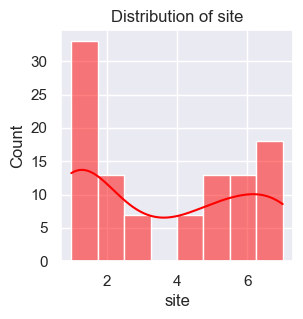

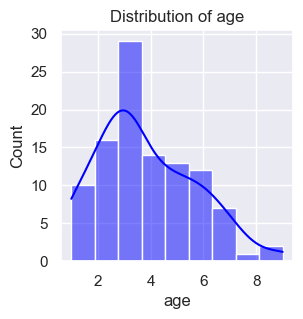

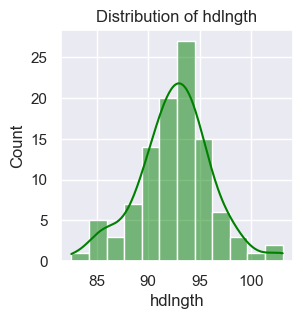

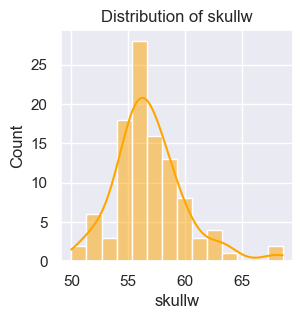

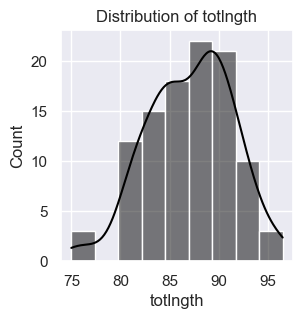

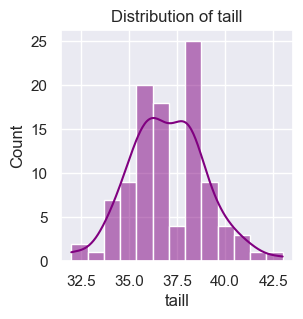

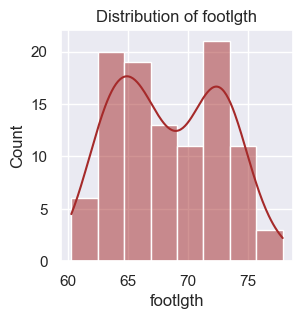

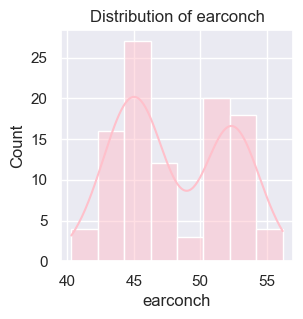

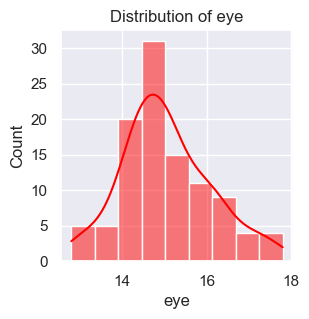

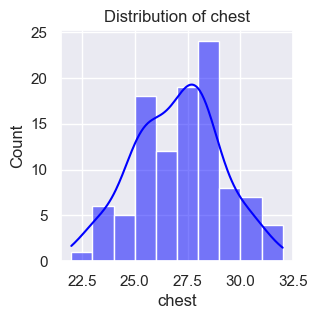

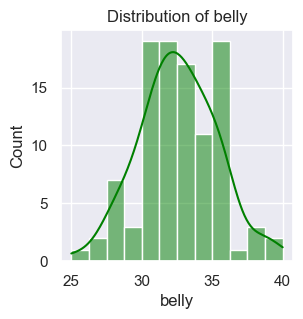

In [190]:
# Vamos a graficar:
colors=["red","blue", "green","orange","black","purple", "brown","pink","red","blue", "green"]

for i in range(11):
    plt.figure(figsize=(3,3))
    sns.set(style="darkgrid")
    sns.histplot(df, x=df[num_columnas[i]], kde=True, color=colors[i])
    plt.title(f"Distribution of {num_columnas[i]}")
    plt.show()

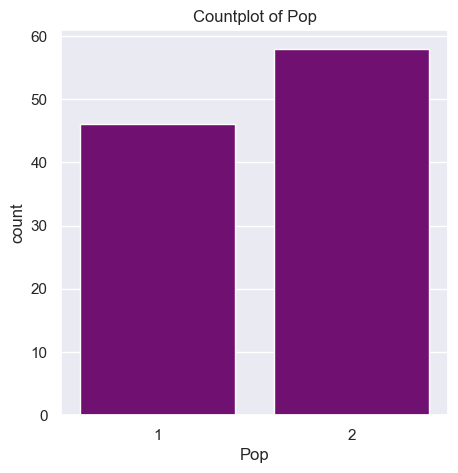

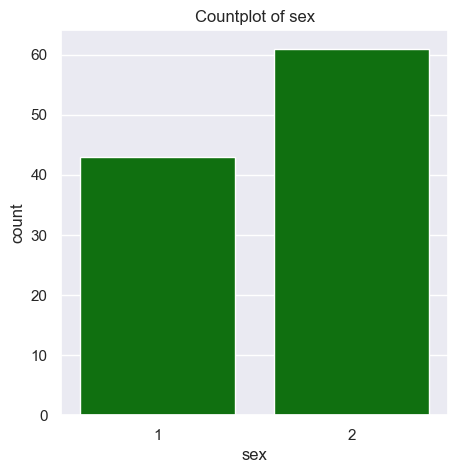

In [191]:
colors=["purple","green"]
for i in range(2):
    plt.figure(figsize=(5,5))
    sns.countplot(df, x=df[str_columnas[i]],color=colors[i])
    plt.title(f"Countplot of {str_columnas[i]}")
    plt.show()
    

In [192]:
df_num = df.drop(['Pop', 'sex'], axis=1)
df_num.corr().style.background_gradient(cmap='plasma')

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.124648,-0.163646,-0.083548,-0.260843,0.380444,-0.780424,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.124648,1.000000,0.321680,0.290232,0.264556,0.124729,0.118403,0.045009,0.239492,0.338276,0.350094
hdlngth,-0.163646,0.321680,1.000000,0.710827,0.691094,0.287429,0.390119,0.121463,0.347175,0.631498,0.562663
skullw,-0.083548,0.290232,0.710827,1.000000,0.526413,0.255921,0.275005,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.260843,0.264556,0.691094,0.526413,1.000000,0.565646,0.443809,0.154484,0.247786,0.577890,0.519465
taill,0.380444,0.124729,0.287429,0.255921,0.565646,1.000000,-0.125963,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.780424,0.118403,0.390119,0.275005,0.443809,-0.125963,1.000000,0.770888,0.004368,0.450566,0.302490
earconch,-0.790716,0.045009,0.121463,-0.000537,0.154484,-0.385136,0.770888,1.000000,-0.165092,0.199230,0.066527
eye,-0.036987,0.239492,0.347175,0.321991,0.247786,0.198134,0.004368,-0.165092,1.000000,0.149338,0.235716
chest,-0.345494,0.338276,0.631498,0.629737,0.577890,0.174997,0.450566,0.199230,0.149338,1.000000,0.606170


*********

In [193]:
fig = px.scatter(df, x="hdlngth", y="age", color="age",trendline="ols", title="Headlength vs Age")
fig.show()

In [194]:
fig = px.box(df, x="Pop", y="hdlngth", points="all", color="sex", title="Headlength vs Population")
fig.show()

**************

In [195]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,2,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,2,2,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,2,2,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,2,1,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,2,2,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


****************

* OUTLIERS

In [196]:
#vamos a usar zscores para ver si hay outliers en nuestras columnas
from scipy.stats import zscore


def detectar_outlierscol(df):
    z_scores = zscore(df)
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)

In [197]:
# #vamos a encodear nuestros datos, otra forma, previamente ya habíamos transformado. 
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# def encodear(df):
#     for col in df.columns:
#         if df[col].dtype == 'object':
#             df[col] = le.fit_transform(df[col])
#     return df

# df = encodear(df)

In [198]:
detectar_outlierscol(df)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,False,False,False,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# #reemplazamos los outliers por su media al solo ser 3 outliers en total, YA HABÍAMOS CORREGIDO CON LA MEDIANA
# def reemplazar_outliers(df):
#     for col in df.columns:
#         if df[col].dtype != 'object':
#             df[col] = np.where(detectar_outlierscol(df[col]), df[col].mean(), df[col])
#     return df
# reemplazar_outliers(df)

******

* NORMALIZACIÓN 

In [208]:
#voy a comprobar los valores minimos y maximos de cada columna para ver si tengo que normalizar
minimos = df.min()
maximos = df.max()

#creo un df con esos valores para verlo mejor
min_max = pd.DataFrame({'min': minimos, 'max': maximos})
min_max.T

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
min,1.0,1.0,1.0,1.0,82.5,50.0,75.0,32.0,60.3,40.3,12.8,22.0,25.0
max,7.0,2.0,2.0,9.0,103.1,68.6,96.5,43.0,77.9,56.2,17.8,32.0,40.0


En este caso, las variables que podrían beneficiarse de la normalización, basándonos en sus valores mínimos y máximos, son:

- hdlngth: varía de 82.5 a 103.1
- skullw: varía de 50.0 a 64.2
- totlngth: varía de 75.0 a 96.5
- taill: varía de 32.0 a 41.5
- footlgth: varía de 60.3 a 77.9
- earconch: varía de 40.3 a 56.2
- eye: varía de 12.8 a 17.8
- chest: varía de 22.0 a 32.0
- belly: varía de 25.0 a 40.0
- case : varía de 1 a 104

Estas variables tienen rangos de valores más amplios en comparación con las otras variables y podrían dominar en los cálculos de distancia si no se normalizan.

Por otro lado, las variables como 'case', 'site', 'Pop', 'sex' y 'age' son variables categóricas o identificadores y no necesitan ser normalizadas.

In [209]:
#Vamos a normalizar esas variables 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def normalizar_variables(df, cols):
    for col in cols:
        df[col] = scaler.fit_transform(df[[col]])
    return df

df = normalizar_variables(df, ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'])


In [210]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,2,8.0,0.563107,0.559140,0.651163,0.363636,0.806818,0.893082,0.48,0.60,0.733333
1,1,1,1,6.0,0.485437,0.408602,0.767442,0.409091,0.693182,0.685535,0.64,0.65,0.533333
2,1,1,1,6.0,0.558252,0.537634,0.953488,0.636364,0.857955,0.729560,0.54,0.80,0.600000
3,1,1,1,6.0,0.519417,0.381720,0.790698,0.545455,0.897727,0.748428,0.48,0.60,0.600000
4,1,1,1,2.0,0.436893,0.338710,0.488372,0.363636,0.607955,0.811321,0.46,0.65,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,2,2,1.0,0.339806,0.322581,0.302326,0.409091,0.323864,0.408805,0.40,0.10,0.133333
100,7,2,2,1.0,0.296117,0.252688,0.348837,0.636364,0.232955,0.484277,0.24,0.30,0.533333
101,7,2,1,6.0,0.480583,0.268817,0.651163,0.545455,0.181818,0.320755,0.04,0.30,0.333333
102,7,2,2,4.0,0.436893,0.279570,0.348837,0.409091,0.147727,0.352201,0.52,0.30,0.266667


***************

* DIVISION DE DATOS

In [199]:
# Nuestra variable objetivo es la edad: 
# Separamos así en train y test
from sklearn.model_selection import train_test_split

X = df.drop('age', axis=1)
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 300 )

C:\Users\Jesús\AppData\Local\Temp\ipykernel_17164\2077797457.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751





 mu = 3.78 and sigma = 1.90



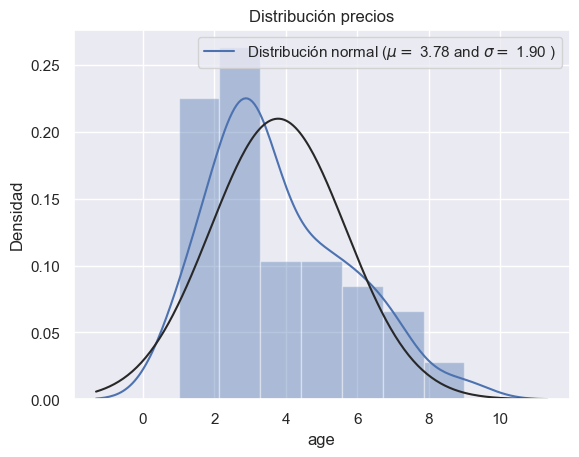

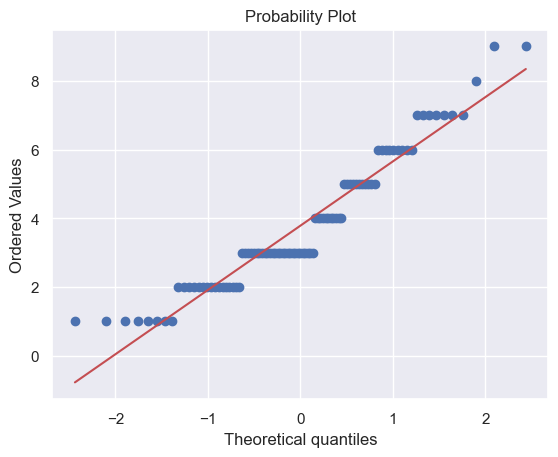

In [200]:
from scipy import stats
train_data = pd.concat([X_train, y_train], axis = 1) #Datos de entrenamiento

sns.distplot(train_data['age'] , fit=stats.norm); #Distribución de precios

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train_data['age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Distribución precios')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['age'], plot=plt)
plt.show()

### Podemos decir que hay una regresión elevada entre variables

* MODELADO DE REGRESIÓN 

In [201]:
X_train.shape, X_test.shape

((93, 12), (11, 12))

In [202]:
y.shape

(104,)

* Modelado de Regresión:
Construyan un modelo de regresión usando el conjunto de entrenamiento. Pueden empezar con una regresión lineal simple y luego explorar modelos más complejos si es necesario.
* Evaluación del Modelo:
Utilicen el conjunto de prueba para evaluar el rendimiento de su modelo. Presten atención a métricas como el RMSE y �2R2.
* Iteración:
Basándose en la evaluación, ajusten su modelo si es necesario. Experimenten con diferentes técnicas de modelado o selección de variables para mejorar los resultados.
* Documentación:
Documenten cuidadosamente su proceso de análisis y los resultados obtenidos, incluyendo gráficos y tablas que resuman sus hallazgos.
* GitHub:
Creación de Repositorio: Crear un repositorio en GitHub para su proyecto.
Estructura del Repositorio: Organizar el repositorio con carpetas claramente definidas para datos, scripts de análisis y documentos.

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

modelo_regresion = LinearRegression()

## Entrenar modelo
modelo_regresion.fit(X_train, y_train)

## Predicciones en el conjunto de prueba
predicciones = modelo_regresion.predict(X_test)
## MSE
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 2.0441985588447875


In [204]:
X_test

,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
95,7,2,2,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
7,1,1,1,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
88,7,2,2,97.7,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5
50,3,2,1,95.6,59.6,85.0,36.0,64.0,43.9,17.4,28.0,38.5
27,1,1,2,93.8,56.8,87.0,34.5,73.2,53.0,15.3,27.0,30.0
90,7,2,2,97.8,59.6,89.0,38.0,65.5,48.0,15.0,26.0,32.0
11,1,1,1,94.9,55.6,92.0,35.5,71.7,51.0,15.3,28.0,33.0
78,6,2,2,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5
79,6,2,2,86.7,52.6,84.0,38.0,62.3,44.8,15.0,23.5,30.5
34,2,1,2,94.4,57.9,85.0,35.5,71.2,55.5,16.4,28.0,35.5


In [205]:
# ### Estandarizamos, media 0 desv 1 en caso de tener datos muy dispares, unos en miles/millones y otros 
# from sklearn.preprocessing import StandardScaler

# std= StandardScaler()
# df[num_columnas]= std.fit_transform(df[num_columnas])
# df[num_columnas]= std.transform(df[num_columnas])

In [206]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Suponiendo que 'y_test' son las etiquetas reales y 'predicciones' son las predicciones del modelo

# Calcular el error cuadrático medio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, predicciones)
print("R-squared (R²) Score:", r2)

Root Mean Squared Error (RMSE): 1.4297547198190281
R-squared (R²) Score: 0.31671816127011254


### Puedo predecir con un 31% de precisión

In [207]:
import joblib

joblib.dump(modelo_regresion, 'possum.pkl')


['possum.pkl']